DATASET : [WATER POTABILITY](https://www.kaggle.com/datasets/adityakadiwal/water-potability/data)

# IMPORTAMOS LIBRERIAS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# CARGAMOS EL DATASET

In [24]:
df = pd.read_csv('/content/water_potability.csv')
df.head(5)

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# EDA

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [4]:
df.shape

(3276, 10)

In [11]:
df.isna().sum()

,0
ph,491
Hardness,0
Solids,0
Chloramines,0
Sulfate,781
Conductivity,0
Organic_carbon,0
Trihalomethanes,162
Turbidity,0
Potability,0


# SEPARAMOS DF EN VARIABLES DEPENDIENTES E INDEPENDIENTES

In [25]:
X = df.iloc[:,0:9].values
y = df.iloc[:,9].values
print(X)
print(y)

[[           nan 2.04890455e+02 2.07913190e+04 ... 1.03797831e+01
  8.69909705e+01 2.96313538e+00]
 [3.71608008e+00 1.29422921e+02 1.86300579e+04 ... 1.51800131e+01
  5.63290763e+01 4.50065627e+00]
 [8.09912419e+00 2.24236259e+02 1.99095417e+04 ... 1.68686369e+01
  6.64200925e+01 3.05593375e+00]
 ...
 [9.41951032e+00 1.75762646e+02 3.31555782e+04 ... 1.10390697e+01
  6.98454003e+01 3.29887550e+00]
 [5.12676292e+00 2.30603758e+02 1.19838694e+04 ... 1.11689462e+01
  7.74882131e+01 4.70865847e+00]
 [7.87467136e+00 1.95102299e+02 1.74041771e+04 ... 1.61403676e+01
  7.86984463e+01 2.30914906e+00]]
[0 0 0 ... 1 1 1]


#IMPUTACION DE VALORES FALTANTES

In [26]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan,strategy='mean')
imputer = imputer.fit(X[:,0:9])
X[:,0:9] = imputer.transform(X[:,0:9])
X

array([[7.08079450e+00, 2.04890455e+02, 2.07913190e+04, ...,
        1.03797831e+01, 8.69909705e+01, 2.96313538e+00],
       [3.71608008e+00, 1.29422921e+02, 1.86300579e+04, ...,
        1.51800131e+01, 5.63290763e+01, 4.50065627e+00],
       [8.09912419e+00, 2.24236259e+02, 1.99095417e+04, ...,
        1.68686369e+01, 6.64200925e+01, 3.05593375e+00],
       ...,
       [9.41951032e+00, 1.75762646e+02, 3.31555782e+04, ...,
        1.10390697e+01, 6.98454003e+01, 3.29887550e+00],
       [5.12676292e+00, 2.30603758e+02, 1.19838694e+04, ...,
        1.11689462e+01, 7.74882131e+01, 4.70865847e+00],
       [7.87467136e+00, 1.95102299e+02, 1.74041771e+04, ...,
        1.61403676e+01, 7.86984463e+01, 2.30914906e+00]])

# ESCALAMIENTO DE DATOS

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)
X


array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

# DIVIDIMOS DATA EN ENTRENAMIENTO Y PRUEBA

In [28]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

# CREAMOS RED NEURONAL CON TENSORFLOW

In [29]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [30]:
red = Sequential()
entrada = Dense(units=5,activation='relu')
oculta1 = Dense(units=5,activation='relu')
salida = Dense(units=1,activation='sigmoid')

red.add(entrada)
red.add(oculta1)
red.add(salida)

red

<Sequential name=sequential_1, built=False>

# COMPILAMOS LA RED CON UN OPTIMIZADOR Y FUNCION DE PERDIDA

In [31]:
red.compile(
    optimizer = tf.keras.optimizers.RMSprop(learning_rate=0.01),
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

# ENTRENAMOS LA RED NEURONAL

In [32]:
model1 = red.fit(X_train,y_train,batch_size=30,epochs=100)


Epoch 1/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5670 - loss: 0.6806
Epoch 2/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6092 - loss: 0.6564
Epoch 3/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5935 - loss: 0.6572
Epoch 4/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6270 - loss: 0.6386
Epoch 5/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6406 - loss: 0.6226
Epoch 6/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6663 - loss: 0.6129
Epoch 7/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6785 - loss: 0.6092
Epoch 8/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6597 - loss: 0.6193
Epoch 9/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6568 - loss: 0.6232
Epoch 10/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6598 - loss: 0.6066
Epoch 11/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6765 - loss: 0.6064
Epoch 12/100
88/88 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy:

# VALIDAMOS EL MODELO DE MI RED NEURONAL

In [39]:
from sklearn.metrics import accuracy_score,confusion_matrix,ConfusionMatrixDisplay

y_pred = red.predict(X_test)
y_pred = np.round(y_pred)

score = accuracy_score(y_test,y_pred)
print(f'el score de validacion y predicción es {score}')

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
el score de validacion y predicción es 0.663109756097561


# MATRIZ DE CONFUSION

In [38]:
matrix = confusion_matrix(y_test,y_pred)
matrix

array([[329,  83],
       [138, 106]])

<Figure size 1100x1100 with 0 Axes>

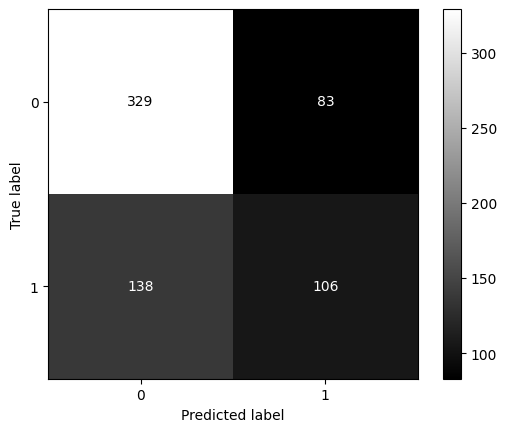

In [40]:
fig = plt.figure(figsize=(11,11))
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm)
disp.plot(cmap='gray')
plt.show()